In [1]:
# Importing Data Manipilation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 

# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# **Loading Dataset**

In [3]:
# Loading the dataset

url = 'https://raw.githubusercontent.com/mukeshmagar543/CODEB_Internship/refs/heads/main/dataset_phishing.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
4329,https://user9765656787.et.r.appspot.com/jim@th...,65,31,1,5,0,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0.153846,0.322581,0,0,1,0,0,3,0,0,1,0,0,0,7,1,1,1,3,17,14,17,6.714286,6.000000,7.666667,0,0,0,0,0,0,21,0.190476,0.809524,0,1,0,0.294118,0,0.000000,0,1,0.000000,0,20.000000,80.000000,0,0,0,25.000000,0,0,0,1,1,0,218,5626,0,0,1,5,phishing
9236,http://encarnacionhurtado.com/img/,34,22,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,2,0,3,18,3,18,18,3,10.500000,18.000000,3.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,287,4460,0,0,1,2,phishing
8552,https://www.finchainforum.it,28,20,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,13,13,0,8.000000,8.000000,0.000000,0,0,0,0,0,0,24,0.666667,0.333333,0,1,0,0.000000,0,0.125000,1,1,25.000000,0,90.000000,10.000000,0,0,0,80.000000,0,0,0,1,1,0,194,902,0,0,1,0,legitimate
11103,https://firebasestorage.googleapis.com/v0/b/ap...,132,30,1,5,5,0,1,1,0,2,0,0,0,7,0,1,0,0,0,0,0,1,0,0,0,0.181818,0.000000,0,0,1,0,0,3,1,0,1,0,0,0,19,6,1,10,1,15,15,12,5.368421,12.500000,4.529412,0,0,0,0,0,0,15,0.200000,0.800000,0,2,0,0.000000,0,0.000000,0,1,0.000000,0,100.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,173,5670,5824,0,1,6,phishing
6315,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,203,14,0,4,0,0,1,10,0,11,0,0,4,3,0,1,0,0,0,0,2,1,0,1,0,0.059113,0.000000,0,0,1,0,0,3,0,0,0,0,0,0,30,11,1,3,1,40,6,40,5.366667,4.500000,5.428571,1,1,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,2975,8347,1,0,0,10,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,http://justlookapp.com/blog/wp-content/themes/...,103,15,1,1,1,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,0,0,0,1,0.165049,0.000000,0,0,0,0,0,1,1,0,0,0,0,0,9,3,2,11,2,32,11,32,9.222222,11.000000,9.000000,3,0,0,0,0,0,88,0.897727,0.102273,0,0,0,0.555556,0,0.222222,1,0,85.714286,0,100.000000,0.000000,0,0,0,85.714286,0,0,0,1,0,0,145,2047,0,0,1,0,phishing
2590,http://www.bionity.com/en/encyclopedia/Virus_l...,57,15,0,3,0,0,0,0,0,0,1,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,7,3,2,3,2,12,7,12,5.714286,5.000000,6.000000,0,0,0,0,0,0,105,0.695238,0.304762,0,0,0,0.718750,0,0.000000,0,0,76.923077,0,63.157895,36.842105,0,0,0,63.333333,0,0,0,1,1,0,299,7370,1303460,0,1,5,legitimate
10106,http://work.chron.com/yearly-salary-cnc-machin...,59

# **Getting Information about Dataset Like which column is object and which column is numerical**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

# **Checking Null Values**
- There is No Null Values are present in the given dataset.

In [5]:
df.isnull().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

# **Descriptive Analysis**

In [6]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

**Separating numerical and categorical columns. Then, for each numeric feature, you analyze spread, skewness, and outliers — very helpful for choosing scaling techniques or detecting which features might need transformation.**

In [7]:
numerical_columns = df.select_dtypes(exclude= 'object')
numerical_columns

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,0,0,0,0,0,0,32,0.375000,0.625000,0,1,0,0.050000,0,0.050000,0,1,16.666667,0,0.000

In [8]:
# Descriptive statistics
from collections import OrderedDict

stats = []

for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,length_url,12.0,1.641000e+03,61.126684,26.0,33.000000,71.000000,38.000000,5.529732e+01,8.085190,144.196391
1,length_hostname,4.0,2.140000e+02,21.090289,16.0,15.000000,24.000000,9.000000,1.077717e+01,5.160078,69.829931
2,ip,0.0,1.000000e+00,0.150569,0.0,0.000000,0.000000,0.000000,3.576436e-01,1.954418,1.820067
3,nb_dots,1.0,2.400000e+01,2.480752,2.0,2.000000,3.000000,1.000000,1.369686e+00,5.718117,66.155843
4,nb_hyphens,0.0,4.300000e+01,0.997550,0.0,0.000000,1.000000,1.000000,2.087087e+00,4.695239,40.696686
5,nb_at,0.0,4.000000e+00,0.022222,0.0,0.000000,0.000000,0.000000,1.554999e-01,8.272893,95.457038
6,nb_qm,0.0,3.000000e+00,0.141207,0.0,0.000000,0.000000,0.000000,3.644558e-01,2.488737,6.060591
7,nb_and,0.0,1.900000e+01,0.162292,0.0,0.000000,0.000000,0.000000,8.213374e-01,9.725295,139.140959
8,nb_or,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
9,nb_eq,0.0,1.900000e+01,0.293176,0.0,0.000000,0.000000,0.000000,9.983172e-01,6.530036,70.909580


# **Frequency distribution for categorical features**
Several features showed significant skewness, suggesting non-normal distributions.

Wide ranges and high standard deviations in some columns (e.g., web_traffic, length_url) indicate the presence of outliers.

Features with high kurtosis are likely to have heavy tails or sharp peaks.

Checking frequency counts for categorical columns — this helps you see whether categories are balanced or dominated by one class (like the target label status).

In [9]:
# Frequency distribution for categorical features (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nFrequency distribution for {col}:\n")
        print(df[col].value_counts())


Frequency distribution for url:

url
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                                                                                                                                                                                                                                                                                                                                                                                           2
https://lt.mydplr.com/16672ac75448ecdb528e1c663c0df3a7-f10ed321df1a4fbc893c86fbb12f0913                                                                                                                                                                                                                                                                                                                                                                                                        

**The target label is balanced — There is no need to use SMOTE techniques to Blanace the Target columm.**

In [10]:
df['status'].mode()

0    legitimate
1      phishing
Name: status, dtype: object

In [11]:
df['url'].mode()

0    http://e710z0ear.du.r.appspot.com/c:/users/use...
Name: url, dtype: object

# **Histogram**
Histograms Reveal skewed features and possible outliers. Some features like web_traffic or length_url may need scaling or normalization.

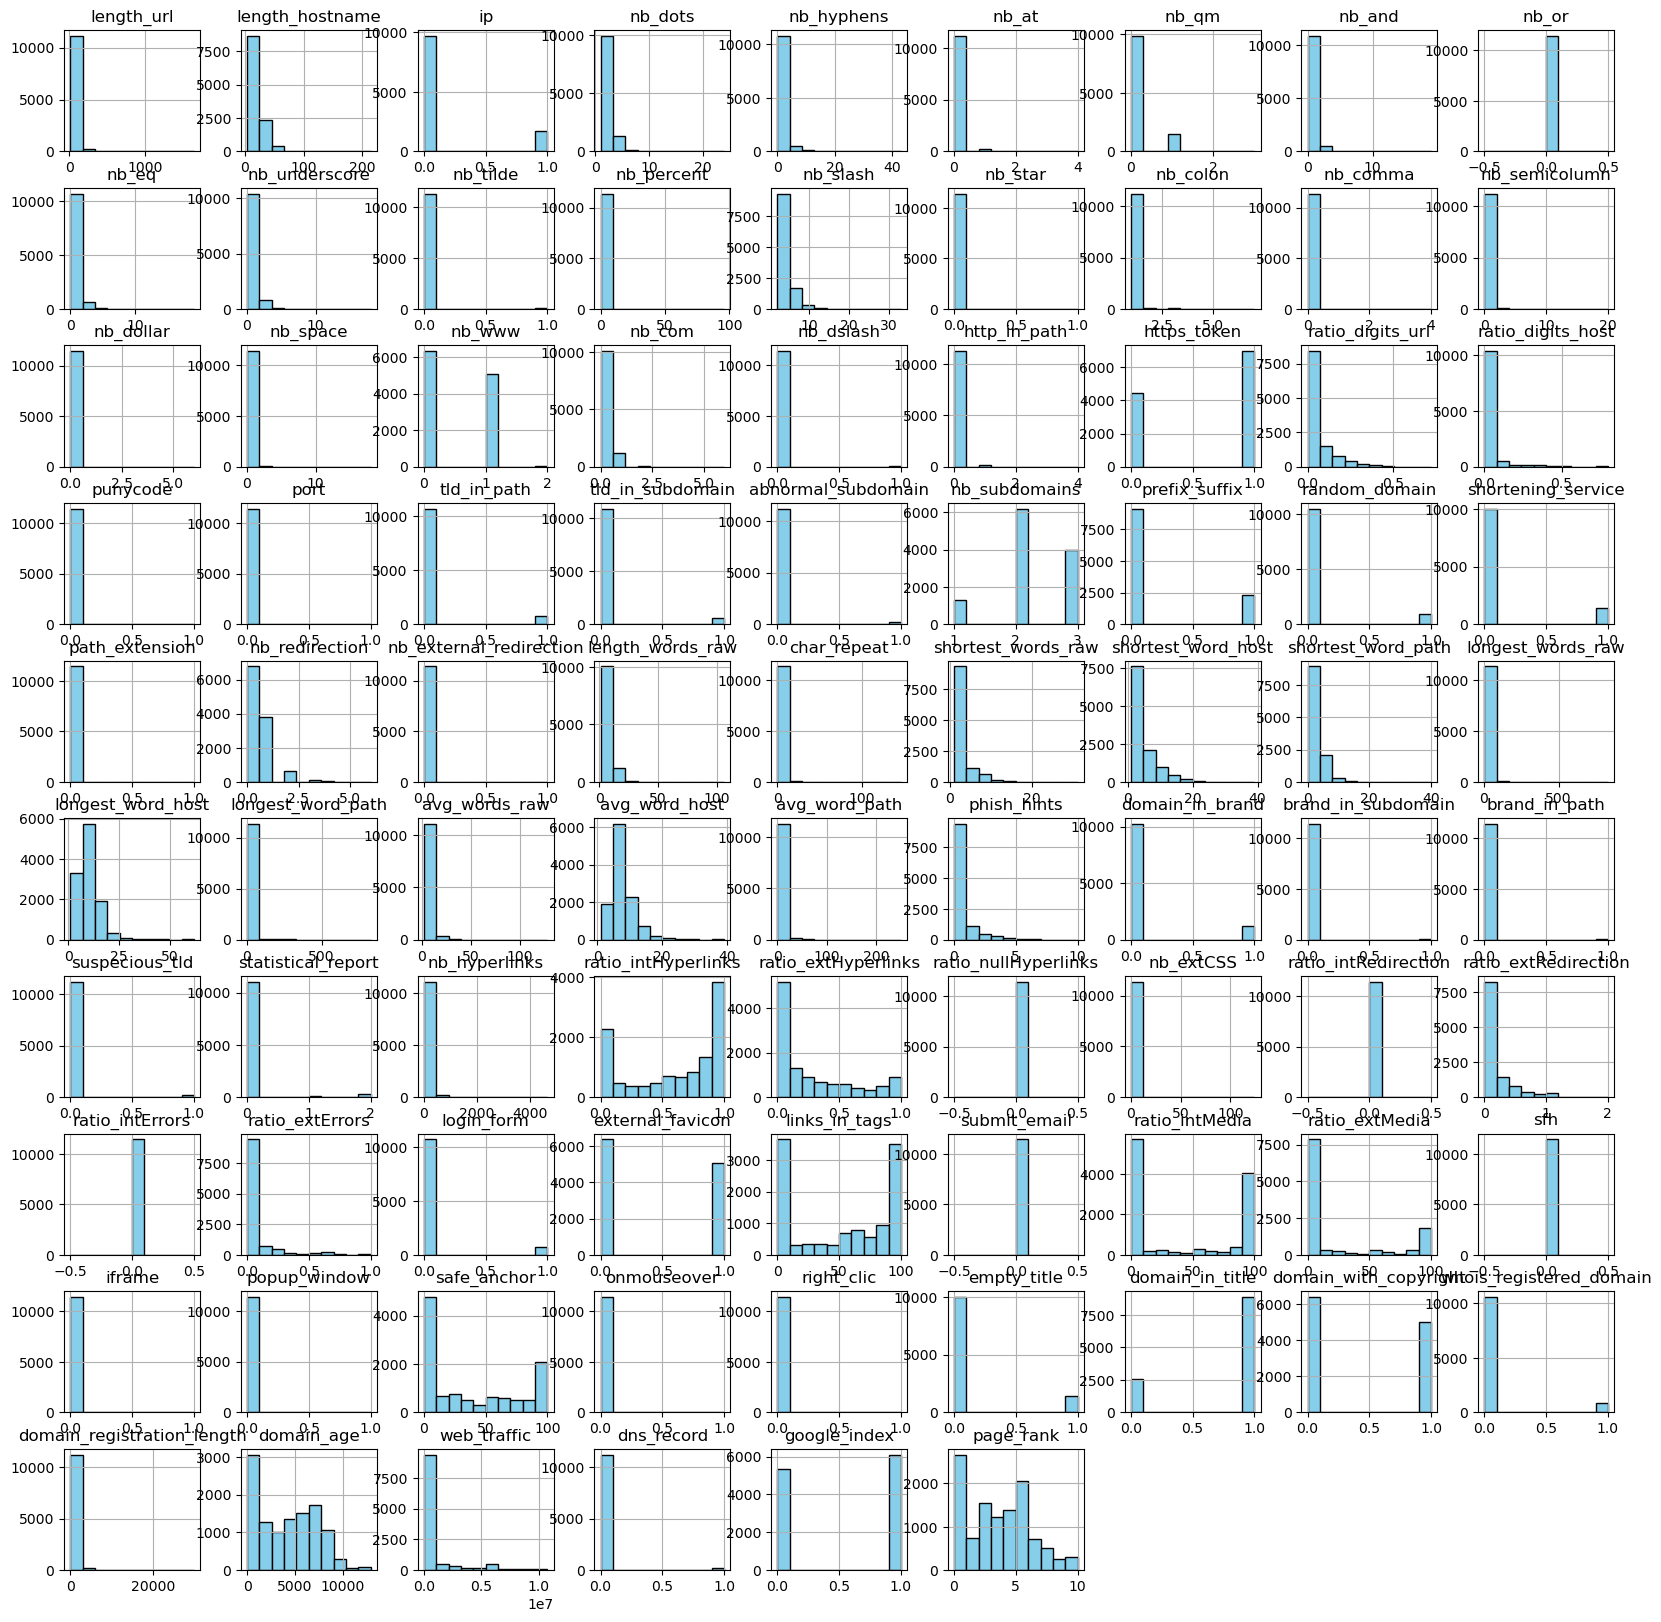

In [12]:
# Histograms for numerical features
numerical_columns.hist(figsize=(20, 20),bins= 10, color= 'skyblue', edgecolor= 'black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# **Pair Plot**
- We have use only selected important features to create the Pair Plot
- The pairplot shows some visual separation between phishing and legitimate classes in selected features — especially in ratio_digits_url and web_traffic. That means these features might be strong indicators for classification.

  

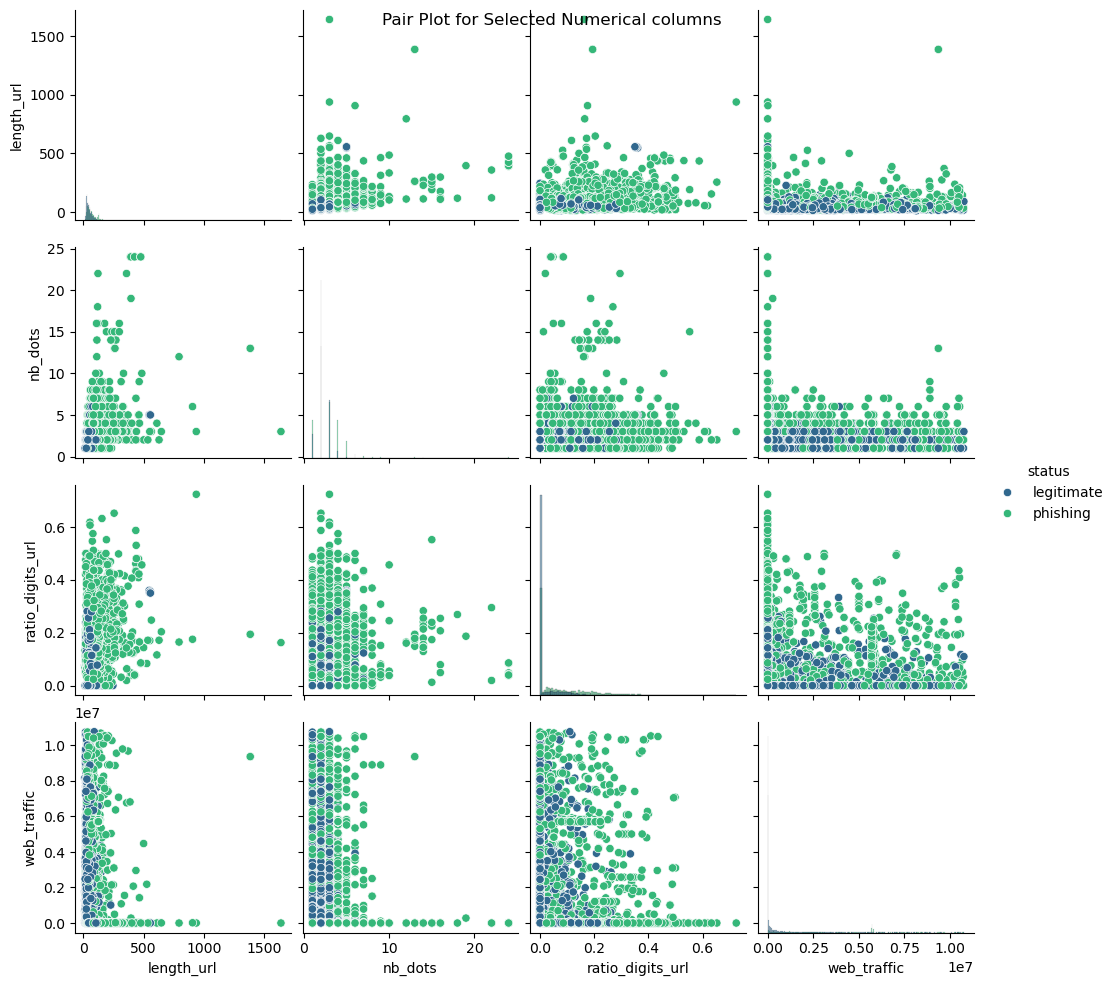

In [13]:
selected_features = ['length_url', 'nb_dots', 'ratio_digits_url', 'web_traffic', 'status']
# plot pair plot
sns.pairplot(df[selected_features], hue='status', diag_kind='hist', palette= 'viridis')
plt.suptitle('Pair Plot for Selected Numerical columns')
plt.show()

**Using Replace function to 'legitimate' and 'phishing' into 0 and 1 — readying the target for machine learning models.**

In [14]:
df['status'] = df['status'].replace({'legitimate' : 0, 'phishing' : 1})

**Label encoding to url column — to convert the categorical data into numerical**

In [15]:
# Using Label Encoding in Url column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['url'] = le.fit_transform(df['url'])
df['url'].value_counts()

url
1065    2
8258    1
363     1
62      1
4501    1
       ..
9799    1
9324    1
6684    1
9920    1
4919    1
Name: count, Length: 11429, dtype: int64

# **Insights and Recommendations**
- Features like `web_traffic`, `SSLfinal_State`, and `page_rank` are crucial indicators.
- The Dataset has huge amount of Outliers.
- Outliers can be capped using the IQR method.
- Use `RobustScaler` to normalize numerical features.
- Remove redundant features with high multicollinearity.
- The target is balance hence, there is no need for SMOTE.
- We can use Feature Engineering. 
- The Dataset have doesn't have any null values. 

# **Checking Duplicates**
Label Encoding was applied to the url column to convert categorical values into numeric form. One-Hot Encoding was avoided because it would have significantly increased the number of columns due to the high number of unique URLs. Label Encoding keeps the dataset compact and efficient without adding unnecessary dimensions.

In [16]:
# Checking Duplicates
duplicates = df.duplicated()
duplicates.value_counts()

False    11430
Name: count, dtype: int64

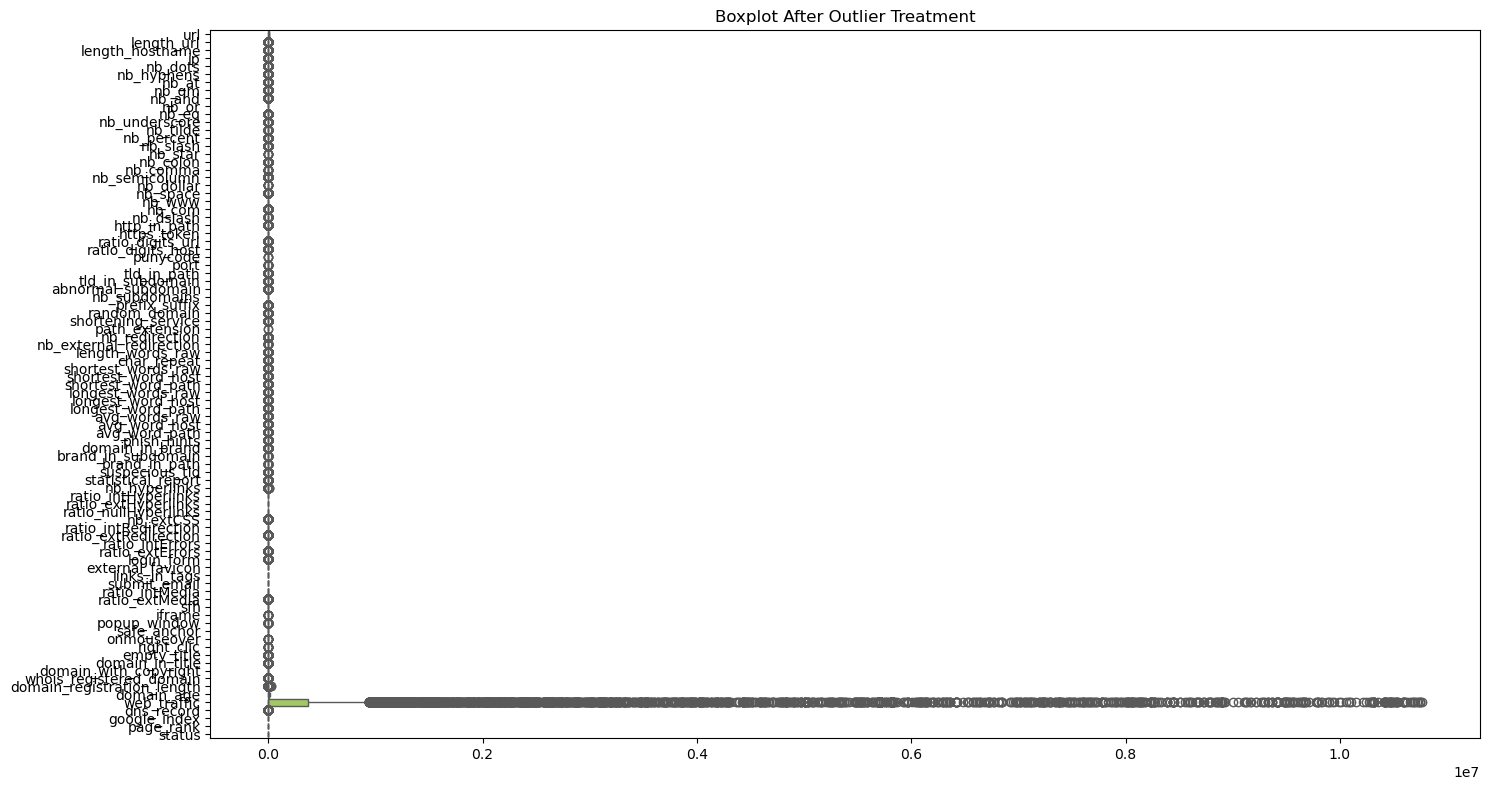

In [17]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [18]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

# **A ranked list of features based on Variance Variance Inflation Factor (VIF)**

In [19]:
# Checking VIF:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('status',axis = 1))

,features,VIF_Values
0,url,9.42
25,https_token,7.70
47,longest_word_path,5.86
33,nb_subdomains,5.36
46,longest_word_host,5.18
4,nb_dots,4.88
58,ratio_intHyperlinks,4.49
45,longest_words_raw,4.38
21,nb_www,4.21
50,avg_word_path,4.16


In [20]:
# Spliting Data into Independent And target Column
X=df.drop(columns='status')
y=df['status']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=42)

In [22]:
X_train_original = X_train.copy()

# **Scaling Technique:- Robust Scaler**
Robust Scaler was used to handle outliers effectively, as boxplots showed many extreme values in the numerical features. It scales data based on the median and IQR, making it less sensitive to outliers compared to StandardScaler or MinMaxScaler.

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

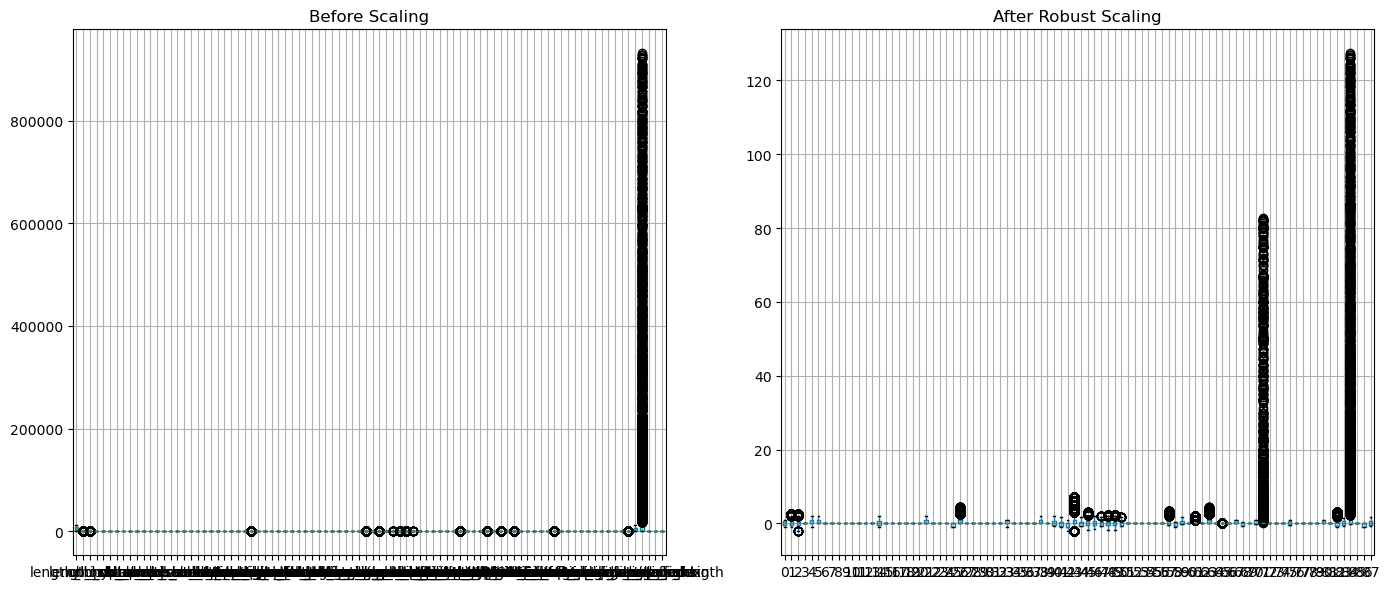

In [24]:
X_train_scaled=X_train.copy()
# If X_train is a NumPy array, convert it to a DataFrame
X_train_df = pd.DataFrame(X_train_original)
X_train_scaled_df = pd.DataFrame(X_train_scaled)

# Plot before and after scaling side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
X_train_df.boxplot()
plt.title("Before Scaling")

plt.subplot(1, 2, 2)
X_train_scaled_df.boxplot()
plt.title("After Robust Scaling")

plt.tight_layout()
plt.show()

In [25]:
# Table summarizing feature correlations
df.corr()['status']

url                          -0.290971
length_url                    0.217898
length_hostname               0.105306
ip                                 NaN
nb_dots                       0.109748
nb_hyphens                    0.158158
nb_at                              NaN
nb_qm                              NaN
nb_and                             NaN
nb_or                              NaN
nb_eq                              NaN
nb_underscore                      NaN
nb_tilde                           NaN
nb_percent                         NaN
nb_slash                      0.201618
nb_star                            NaN
nb_colon                           NaN
nb_comma                           NaN
nb_semicolumn                      NaN
nb_dollar                          NaN
nb_space                           NaN
nb_www                       -0.443468
nb_com                             NaN
nb_dslash                          NaN
http_in_path                       NaN
https_token              

# **Appling PCA for Dimenstion Reduction**
Displaying Variance Ratio

In [26]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df

Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


# **Training Machine Learning Model**
# *1 *Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X = pca_df.drop(columns= 'status', axis=1)
y = pca_df['status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score_LR = accuracy_score(y_pred_LR, y_test)
accuracy_score_LR
print(f'Accuracy : {round(accuracy_score_LR * 100,2)}%')


Accuracy : 61.42%


# **2 Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_pred_DT, y_test)
accuracy_score_DT
print(f'Accuracy : {round(accuracy_score_DT * 100,2)}%')

Accuracy : 80.66%


# **3 Random Forest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF
print(f'Accuracy : {round(accuracy_score_RF * 100,2)}%')

Accuracy : 85.21%
